<a href="https://colab.research.google.com/github/rodrigoviana-ds/Projetos/blob/main/KNN_PlanoSaude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Medical Cost Data** 

#**Modelo de Regressão KNN**

#Considerando as variáveis:

*   X = BMI;
*   y = charges.



In [92]:
import pandas as pd

In [93]:
caminho = '/content/insurance.csv'
dados = pd.read_csv(caminho)

In [94]:
X = dados['bmi'].values.reshape(-1, 1)
y = dados['charges']

In [95]:
import sklearn

In [96]:
from sklearn.model_selection import train_test_split 

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)

In [97]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 100)
knnreg.fit(Xtreino, ytreino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                    weights='uniform')

In [98]:
from sklearn.metrics import mean_squared_error

preditos_treino = knnreg.predict(Xtreino)
preditos_teste = knnreg.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

print('O Erro Quadrático Médio de TREINO foi: {:.2f}'.format(eqm_treino))
print('O Erro Quadrático Médio de TESTE foi:  {:.2f}'.format(eqm_teste))

O Erro Quadrático Médio de TREINO foi: 143468252.15
O Erro Quadrático Médio de TESTE foi:  128286660.53


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

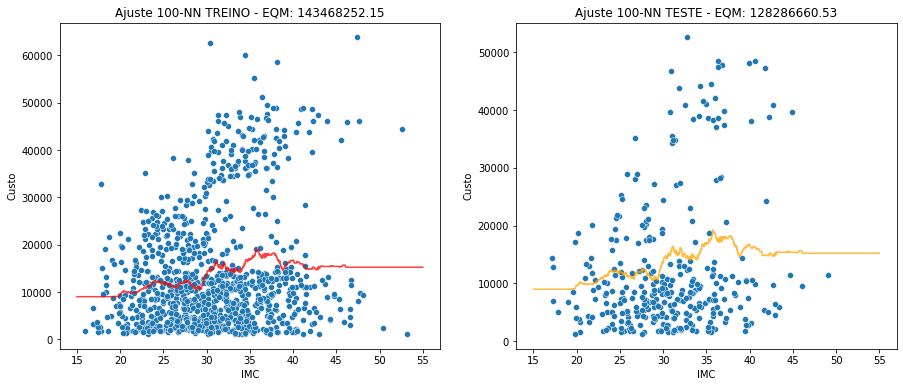

In [113]:
k = 100

knnreg = KNeighborsRegressor(n_neighbors = k)
knnreg.fit(Xtreino, ytreino)

preditos_treino = knnreg.predict(Xtreino)
preditos_teste = knnreg.predict(Xteste)

eqm_treino = mean_squared_error(preditos_treino, ytreino)
eqm_teste = mean_squared_error(preditos_teste, yteste)

import numpy as np

x = np.arange(15, 55, 0.01)
y0 = knnreg.predict(x.reshape(-1, 1))

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x = Xtreino.reshape(-1), y = ytreino)
plt.plot(x, y0, color = 'red', alpha = 0.75)
plt.title('Ajuste {}-NN TREINO - EQM: '.format(k) + str(round(eqm_treino, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo')  

plt.subplot(1, 2, 2)
sns.scatterplot(x = Xteste.reshape(-1), y = yteste)
plt.plot(x, y0, color = 'orange', alpha = 0.75)
plt.title('Ajuste {}-NN TESTE - EQM: '.format(k) + str(round(eqm_teste, 2)))
plt.xlabel('IMC')
plt.ylabel('Custo') 
plt.show()



#**Desafio:** descobrir a melhor quantidade de vizinhos para se utilizar no KNN